##### Comparison of observables between data of food webs
In order to distinguish and analyse emerging patterns on food webs and comparing them with random models of matrices generation it's useful to discuss about some characteristic properties of each empirical one. 
$S$ the number of species, $C$ the number of effective links w.r.t the total number of possible interactions, called also connectance, #top the number of top predators inside the food web, #basal the number of basal species, $\gamma_{in}$ and $\gamma_{out}$ for the purpose of seeing how the degree distribution changes between different datasets, eventually assortativity and robustness. <br>
From a graphical point of view it's meaningful to trying to visualize food webs and detecting those similarities or differences difficult to see to the naked eye.

In [1]:
import FoodWebAnalysis as fw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import networkx as nx

paths = glob.glob("./data/FW*")
# # glob function returns all files that match that expression in the directory chosen 

dataframes = [fw.load_df(i, to_bool=True, normalize=False).astype(int) for i in paths]
# # fw.load_df(paths[0])

(2.9817730831652027, 0.34694127803532393) (2.1489190309245823, 0.2770063995136438)


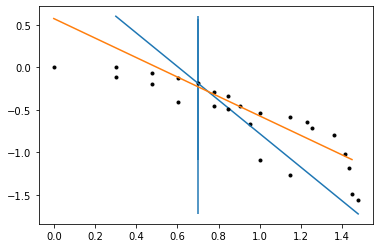

In [4]:
# let's start from simple number of species connectance, #top and #basals for all datasets

s = len(dataframes[0].columns)
c = dataframes[0].sum().sum()/(s*s)
# dataframes_copy = []
dataframes_copy = pd.DataFrame.copy(dataframes[0])
for i in range(s):
    dataframes_copy.iloc[i,i] = 0
    
ntop = dataframes_copy[dataframes_copy.sum(axis=1) == 0].shape[0]
nbasal = dataframes_copy[dataframes[0].sum(axis=0) == 0].shape[0]

kin,kout = fw.find_degree(dataframes[0])
print(fw.gamma_linear_fit2(dataframes[6],5, plot=True),fw.gamma_linear_fit2(dataframes[6].T,5, plot=True))
# gammalinearfitkmin = [4,5,4,4,4,7,5]


In [6]:
# assortativity and robustness

assort = fw.compute_assortaivity(dataframes[0].values.astype(bool))
robust = fw.directed_robustness(dataframes[1].values)
print(assort, robust)

(-0.6054606732029941, 0.15870592007658155) 0.7


##### Generalization of the previous calculations to a routine for all networks

In [2]:
# let's generalize the process of computing all these observables and putting them into a table 
gammalinearfitkmin = [4,2,5,4,4,4,7,5]
s = []
c = []
kmean = []
ntop = []
nbasal = []
# kin = []
# kout = []
gammain = []
gammainerr = []
gammaout = []
gammaouterr = []
assort = []
robust = []
for i in range(len(paths)):

    s.append(len(dataframes[i].columns))
    c.append(dataframes[i].sum().sum()/(len(dataframes[i].columns)*len(dataframes[i].columns)))
    kmean.append(2*dataframes[i].sum().sum()/(len(dataframes[i].columns)))

    # dataframes_copy = []
    dataframes_copy = pd.DataFrame.copy(dataframes[i])
    for j in range(len(dataframes[i].columns)):
        dataframes_copy.iloc[j,j] = 0
        
    ntop.append((dataframes_copy[dataframes_copy.sum(axis=1) == 0].shape[0])/len(dataframes[i].columns))
    nbasal.append(dataframes_copy[dataframes[i].sum(axis=0) == 0].shape[0]/len(dataframes[i].columns))

    # kin.append((fw.find_degree(dataframes[i])[0]).mean())
    # kout.append(fw.find_degree(dataframes[i])[1].mean())
    
    # print(gammalinearfitkmin[i])
    gammain.append(fw.gamma_linear_fit2(dataframes[i],gammalinearfitkmin[i])[0])
    gammainerr.append(fw.gamma_linear_fit2(dataframes[i],gammalinearfitkmin[i])[1])
    gammaout.append(fw.gamma_linear_fit2(dataframes[i].T,gammalinearfitkmin[i])[0])
    gammaouterr.append(fw.gamma_linear_fit2(dataframes[i].T,gammalinearfitkmin[i])[1])


    assort.append(fw.compute_assortaivity(dataframes[i].values.astype(bool)))
    robust.append(fw.directed_robustness(dataframes[i].values))

In [116]:
ntopp = robust[0:4]
ntopp.append(robust[-1])
# (np.array(ntopp).sum())/5
np.std(np.array(ntopp))

0.12333855844787546

In [3]:
tablerows = ["s","c","kmean","ntop","nbasal","gammain","gammaout","assort","robust"]
listoflist = [s,c,kmean,ntop,nbasal,gammain,gammaout,assort,robust]
table = pd.DataFrame(listoflist)

# for j,i in enumerate(tablecolumns):
#     table.loc[i] = listoflist[j]
table.columns = ["FW_0" + "0%i" %i for i in [4,7,8,10,11,12,15,16]]
table.set_axis(tablerows, inplace = True)

In [7]:
table

,FW_004,FW_007,FW_008,FW_0010,FW_0011,FW_0012,FW_0015,FW_0016
s,32.000000,48.000000,293.000000,39.000000,105.000000,71.000000,107.000000,37.000000
c,0.136719,0.095920,0.038591,0.163051,0.031111,0.029359,0.084374,0.176771
kmean,8.750000,9.208333,22.614334,12.717949,6.533333,4.169014,18.056075,13.081081
ntop,0.062500,0.187500,0.153584,0.076923,0.314286,0.366197,0.121495,0.000000
nbasal,0.125000,0.125000,0.167235,0.102564,0.457143,0.535211,0.467290,0.162162
gammain,2.679540,2.775770,2.606199,2.756327,2.389448,1.824330,3.032194,2.981773
gammaout,2.862318,2.764167,2.142051,2.682548,3.595702,2.607267,2.790831,2.148919
assort,-0.605461,-0.051400,-0.454923,-0.426569,-0.533274,-0.589668,0.169740,-0.383484
robust,0.875000,0.667000,0.686000,0.641000,0.429000,0.211000,0.720000,0.946000


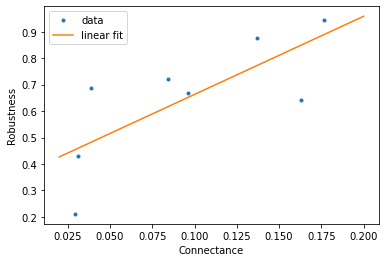

In [41]:
# comparison between mean degree and size and other observables
xp = np.linspace(0.02, 0.2, 100) 
p3 = np.poly1d(np.polyfit(c, robust, 1))
_ = plt.plot(c, robust, '.',label = "data")
__ = plt.plot(xp, p3(xp), '-', label = "linear fit")
plt.xlabel("Connectance")
plt.ylabel("Robustness")
plt.legend()
plt.show()

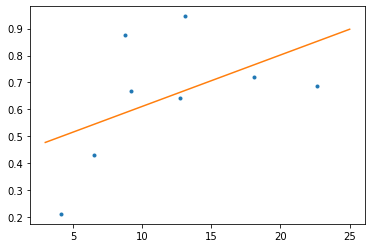

In [36]:
xp = np.linspace(3, 25, 100) 
p3 = np.poly1d(np.polyfit(kmean, robust, 1))
_ = plt.plot(kmean, robust, '.', xp, p3(xp), '-')
plt.show()

In [48]:
gammain = [[(3.1552639951468966, 0.10299472755659393), (3.540761291923426, 0.73860484055485), (4.699879277785764, 1.1724875074387486)], [(4.793945708146262, 0.6611558063532835), (4.7026829401667465, 0.44202595657847255), (4.070623953233455, 0.46365012357281704)], [(4.6234188124148385, 0.5069340940496951), (4.453889645389836, 0.38113437647396614), (3.9719502110862956, 0.20862569998516084)], [(6.3219174956736754, 1.124581304238685), (5.738129410326548, 1.0164976414971536), (4.674531830830686, 0.37249756818918023)], [(3.4974264392545256, 0.5129155596278406), (5.229113590505166, 0.8614713645170154), (4.603037505125354, 0.5214199661770013)]]
gammaout = [[(2.1077401687040167, 0.2308564573263283), (3.2016420727047947, 0.28128914158876317), (2.26457095307308, 0.28730085934796423)], [(1.9190080316836586, 0.3472661870431809), (2.433731671493902, 0.10744142236491587), (2.5033313894295746, 0.27951551533365243)], [(3.0856483536216492, 0.46994242866460123), (2.6699146490841503, 0.08741161327047207), (2.6306673054017145, 0.08071721489694654)], [(2.1909409121724828, 0.395328370430652), (3.3231758594438086, 0.20306230858202615), (2.774216329782668, 0.32544305309886973)], [(3.1722517952087137, 0.47654358599083996), (2.955338609002769, 0.3665725379077694), (3.5076802285605053, 0.3721573921663566)]]

In [49]:
gammainreal = [(2.6,0.2),(2.7,0.3),(2.60,0.04),(2.75,0.07),(3.0,0.3)]
gammaoutreal = [(2.8,0.2),(2.7,0.2),(2.14,0.04),(2.7,0.2),(2.1,0.2)]

In [68]:
errorsgammain = [gammainreal[i][1] for i in range(len(gammainreal))]
errorsgammaout = [gammaoutreal[i][1] for i in range(len(gammaoutreal))]


In [64]:
cascadeerrorsgammain = [gammain[i][0][1] for i in range(len(gammain))]
nicherrorsgammain = [gammain[i][1][1] for i in range(len(gammain))]
nestederrorsgammain = [gammain[i][2][1] for i in range(len(gammain))]
cascadeerrorsgammaout = [gammaout[i][0][1] for i in range(len(gammaout))]
nicherrorsgammaout = [gammaout[i][1][1] for i in range(len(gammaout))]
nestederrorsgammaout = [gammaout[i][2][1] for i in range(len(gammaout))]

In [79]:
print(np.array(gammainreal).sum()/5, np.array(gammaoutreal).sum()/5)

2.9120000000000004 2.6559999999999997


In [74]:
toterrgammain = ((np.array(errorsgammain)**2).sum())/5
toterrgammaout = ((np.array(errorsgammaout)**2).sum())/5
print(toterrgammain,toterrgammaout)

0.04529999999999999 0.03232


In [84]:
print(np.array([gammain[i][2][0] for i in range(len(gammain))]).sum()/5, np.array([gammaout[i][2][0] for i in range(len(gammaout))]).sum()/5)
print(((np.array(nestederrorsgammain)**2).sum())/5, ((np.array(nestederrorsgammaout)**2).sum())/5)

4.404004555612311 2.7360932412495087
0.4087712588636389 0.0823200562458826


In [ ]:
toterrgammain = ((np.array(errorsgammain)**2).sum())/5
toterrgammaout = ((np.array(errorsgammaout)**2).sum())/5

0.0216

In [12]:
table.applymap(lambda x: np.round(x, decimals = 3))

,FW_004,FW_007,FW_008,FW_0010,FW_0011,FW_0012,FW_0015,FW_0016
s,32.000,48.000,293.000,39.000,105.000,71.000,107.000,37.000
c,0.137,0.096,0.039,0.163,0.031,0.029,0.084,0.177
ntop,0.062,0.188,0.154,0.077,0.314,0.366,0.121,0.000
nbasal,0.125,0.125,0.167,0.103,0.457,0.535,0.467,0.162
gammain,2.680,2.776,2.606,2.756,2.389,1.824,3.032,2.982
gammaout,2.862,2.764,2.142,2.683,3.596,2.607,2.791,2.149
assort,-0.605,-0.051,-0.455,-0.427,-0.533,-0.590,0.170,-0.383
robust,0.875,0.667,0.686,0.641,0.429,0.211,0.720,0.946


In [11]:
pd.DataFrame.to_csv(table.applymap(lambda x: np.round(x, decimals = 3)), "./table")

In [24]:
dataframes[7].loc[dataframes[7].sum(axis = 1) == 0]

,Alkmaria romijni,Ampithoe valida,Aonides oxycephala,Capitella capitata,Carcinus maenas,Cerastoderma edule,Chaetozone setosa,Crangon crangon,Cyathura carinata,Detritus,...,Mytilus sp1 FW_016_01,Nemertini,Nephthys sp1 FW_016_01,Oligochaets,Phytoplankton,Pygospio elegans,Scrobicularia plana,Streblospio shrubsolii,Zooplankton,Zostera noltii


In [16]:
dataframes[7][dataframes[7].sum(axis = 0) == 0]


,Alkmaria romijni,Ampithoe valida,Aonides oxycephala,Capitella capitata,Carcinus maenas,Cerastoderma edule,Chaetozone setosa,Crangon crangon,Cyathura carinata,Detritus,...,Mytilus sp1 FW_016_01,Nemertini,Nephthys sp1 FW_016_01,Oligochaets,Phytoplankton,Pygospio elegans,Scrobicularia plana,Streblospio shrubsolii,Zooplankton,Zostera noltii
Detritus,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,0,1,1,1,0,0
Green macroalgae,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Imports,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Microphytobenthos,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
Phytoplankton,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
Zostera noltii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
dataframes[pupa][dataframes[pupa].sum(axis = 0) == 0]

,Unidentified sp1 FW_012_02,Terrestrial plants,Terrestrial bugs,Achnanthes inflata var. elata,Achnanthes lanceolata,Achnanthes linearis,Achnanthes minutissima,Auodinella hermanii,Blue Green algae,Calothrix,...,Pentaneuri sp1 FW_012_02,Polycentropus maculatus,Stenelmis,Tallaperla maria,Tanyderid,Conchapelopia,Tipula,Wormaldia moesta,Crayfish,Salamander
Unidentified sp1 FW_012_02,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,1
Terrestrial plants,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,0,1,1
Terrestrial bugs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
Achnanthes inflata var. elata,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Achnanthes lanceolata,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Achnanthes linearis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Achnanthes minutissima,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Auodinella hermanii,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Blue Green algae,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Calothrix,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


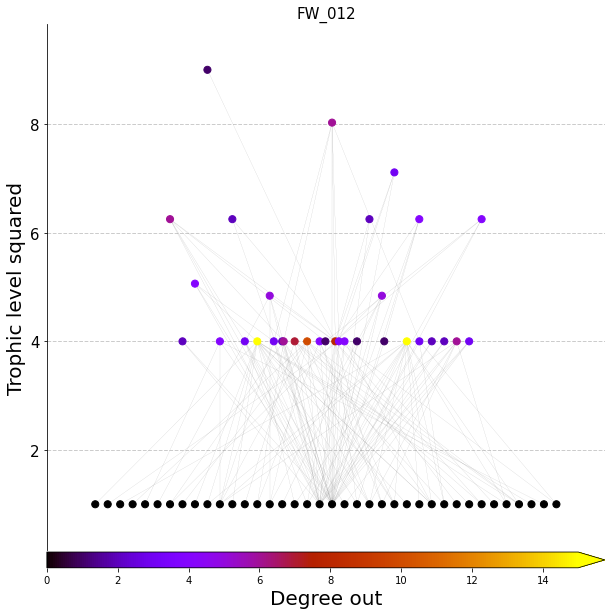

<Figure size 576x432 with 0 Axes>

In [13]:
pupa = 5
a = dataframes[pupa].values
kin,kout = fw.find_degree(dataframes[pupa])

# node_colors = np.log2(fw.score_distribution(a,"influence"))
node_colors = kout 
# quanto è variegata la dieta di ogni specie e dipende da quante basal ci sono, fai esempio di carnivori
# che mangiano erbivori che non sono basal mentre gli erbivori se ci sono tante basal mangiano tanto, gruppi centrali hanno 
# un degree out maggiore  
# node_colors = fw.PageRank(dataframes[0])
fig,ax = plt.subplots(figsize=(10, 10))
fw.dir_graph(dataframes[pupa],node_colors,node_size=50,width=0.1, colormap_label='Degree out'
             ,top_labels = False, basal_labels = False, 
             top_label_raise=0.2,basal_label_lower = 0.1, colorbarway = True, 
             arrows = False,ax1 = ax,fig1=fig)
ax.set_title('FW_012', fontsize = 15)
plt.show()

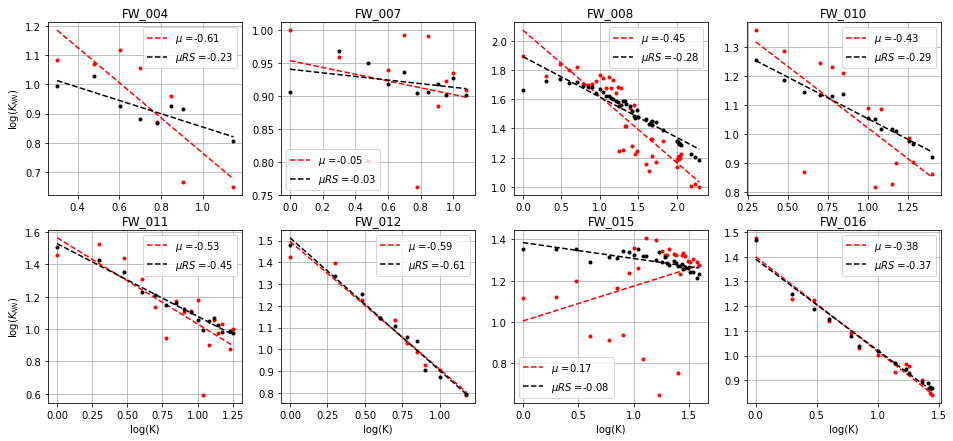

In [5]:
def compute_assortaivity(A,plot=False, return_arrays=False,compute_RS=False,n_iter=20):
    """Compute assortativity 
        (ATTENTION!!!!!!!A needs to be a boolean matrix)
        Returns:
                mu and computed error on mu"""
    deg = [np.sum(a) for a in A.T if a.sum()]
    Knn = np.array([np.sum(A[mask])/(mask.sum()) for mask in A.T if mask.sum()])
    unique_deg,counts = np.unique(deg,return_counts=True)
    Knn_redux = []
    for u_deg,count in zip(unique_deg,counts):
        mask = deg==u_deg
        Knn_redux.append(Knn[mask].sum()/count)

    logu,logKnn = np.log10(unique_deg),np.log10(Knn_redux)
    params,cov = np.polyfit(logu,logKnn,1,cov=True)
    mu,q = params[0],params[1]
    #plt.plot(logdeg,logKnn,'k.',label = 'mu = ' +str(mu))
    if plot:
        plt.plot(np.log10(unique_deg),np.log10(Knn_redux),'r.')
        plt.plot(logu,logu*mu+q,'r--',label = '$\mu $ =%.2f' % (params[0]))
        if compute_RS:
            logdegtot,logknntot=[],[]
            mumean=0
            for j in np.arange(n_iter):
                B = random_edge_swap(A).astype(bool)
                mu,_,logdeg,logKnn = compute_assortaivity(B,False,True)
                logdegtot.append(logdeg)
                logknntot.append(logKnn)
            logdegtot,logknntot = np.array(logdegtot).mean(axis=0) , np.array(logknntot).mean(axis=0)
            params,cov = np.polyfit(logdegtot,logknntot,1,cov=True)
            plt.plot(logdegtot,logknntot,'k.')
            plt.plot(logdegtot,logdegtot*params[0]+params[1],'k--',label='$\mu RS$ =%.2f' % (params[0]))

        plt.legend()

    if return_arrays:
        return mu, np.sqrt(cov[0,0]),logu,logKnn
    else:
        return mu, np.sqrt(cov[0,0])
        
def random_edge_swap(A,n_swaps=None):
    DiG = nx.DiGraph(A)
    edgelist = list(DiG.edges)
    N = len(edgelist)

    if n_swaps is None:
        n_swaps = N*3
    for i in np.arange(n_swaps):
        edgelist = np.array(DiG.edges)
        e1,e2 = edgelist[np.random.choice(N,2)]
        oh = edgelist==np.array([e1[0],e2[1]])
        ah = edgelist==np.array([e2[0],e1[1]])


        if (not  (oh[:,0]*oh[:,1]).any() ) and ( not (ah[:,0]*ah[:,1]).any()):
            DiG.remove_edge(*e1)
            DiG.remove_edge(*e2)
            DiG.add_edge(e1[0],e2[1])
            DiG.add_edge(e2[0],e1[1])
        else:
            continue
    return nx.to_numpy_array(DiG)

nets = ['FW_004','FW_007','FW_008','FW_010','FW_011','FW_012_02','FW_015_04','FW_016_01']
titles = ['FW_004','FW_007','FW_008','FW_010','FW_011','FW_012','FW_015','FW_016']
fig = plt.figure(figsize=[16,7])
for df,title,plotn in zip(nets,titles,range(241,249)):
    A,h = fw.load_df(df+'.csv', to_bool = True , normalize = False, to_matrix=True)
    fig.add_subplot(plotn)
    plt.grid()
    plt.title(title)
    _ = compute_assortaivity(A,True,True,True,5)
    if plotn==241 or plotn == 245:
        plt.ylabel('log($K_{NN}$)')
    if plotn>=245:
        plt.xlabel('log(K)')


In [118]:
plt.hist()

,Acestrorhyncus lacustris,Astyanax altiparanae,Auchenipterus nuchalis,Benthos,Detritus,Group 1,Group 2,Hoplias malabaricus,Hypophthalmus edentatus,Hypostomus spp.,...,Prochilodus lineatus,Pterodoras granulosus,Rhaphiodon vulpinus,Rhinelepis aspera,Schizodon borellii,Trachydoras paraguayensis,Zooplankton,other detritivores,other insectivores,other omnivores
Acestrorhyncus lacustris,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
Astyanax altiparanae,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Auchenipterus nuchalis,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Benthos,0,0,0,0,0,1,0,0,0,0,...,1,1,0,1,0,0,0,1,0,1
Detritus,0,0,0,1,0,1,0,0,0,1,...,1,1,0,1,0,1,1,1,1,1
Group 1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Group 2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hoplias malabaricus,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Hypophthalmus edentatus,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hypostomus spp.,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
def generate_nested(s,c, check = False):
    # np.random.seed(1235)
    dataframe = pd.DataFrame(np.zeros((s,s)))#, index = np.arange(5) + 1) 
    ni = np.random.uniform(0, 1, size = s)
    dataframe = dataframe.set_index(ni)
    dataframe.columns = ni
    dataframe.columns = dataframe.columns.sort_values() 
    dataframe = dataframe.set_index(dataframe.columns)
    y = np.random.uniform(0, 1, size = s)
    ri = ni*(1 - (1 - y)**(2*c/(1-2*c)))
    ri /= np.sum(ri)
    ri = (ri*s*s*c).astype(int)
    ri[0] = 0 # in order to have at least a basal species
    ri[ri > s-1] = s-1
    for i in range(s):
        while dataframe[dataframe.columns[i]].sum() < ri[i]:
            randomprey = np.random.randint(i+1) # 1
            dataframe[dataframe.columns[i]].iloc[randomprey] = 1
            if dataframe.iloc[randomprey].sum() == 1: # 2 
                True
            elif dataframe[dataframe.columns[i]].sum() < ri[i]: 
                try: 
                    a = np.random.choice(dataframe[dataframe.columns[dataframe.iloc[randomprey] != 0]].columns)
                    randomprey1 = np.random.choice(dataframe[dataframe[a] != 0].index)
                    dataframe[dataframe.columns[i]].loc[randomprey1] = 1
                except: continue
            if (dataframe[dataframe.columns[i]].sum() < ri[i]) and (dataframe.iloc[randomprey].sum() == 1):
                randomprey0 = np.random.randint(i,s)
                dataframe[dataframe.columns[i]].iloc[randomprey0] = 1
            elif (dataframe[dataframe.columns[i]].sum() < ri[i]) and (dataframe.iloc[randomprey].sum() != 1):
                randomprey2 = np.random.randint(i,s) 
                dataframe[dataframe.columns[i]].iloc[randomprey2] = 1
    if (dataframe.sum().sum() == sum(ri)) and check == True: print("sanity check")
    dataframe.iloc[s-1][dataframe.columns[:-1]] = np.zeros(s-1) # in order to have at least a top species
    n = np.array(dataframe)
    return n.astype(int)
fw.generate_cascade(5,0.3)

array([[0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0]])

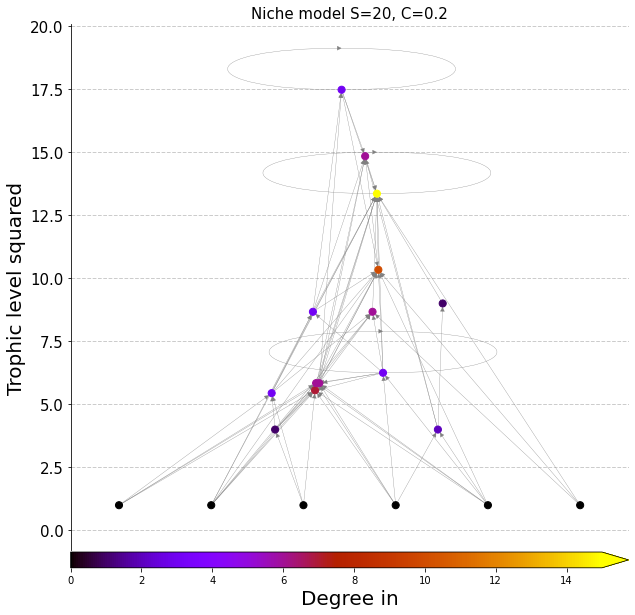

<Figure size 576x432 with 0 Axes>

In [38]:
data = pd.DataFrame(fw.generate_niche(20,0.2))
kin,kout = fw.find_degree(data)
node_colors = kout 
# fw.generate_cascade(20,0.2)
fig,ax = plt.subplots(figsize=(10, 10))
fw.dir_graph(data,node_colors,node_size=50,width=0.3, colormap_label='Degree in'
             ,top_labels = False, basal_labels = False, 
             top_label_raise=0.2,basal_label_lower = 0.1, colorbarway = True, 
             arrows = True,ax1 = ax,fig1=fig, spacing=0.5)
# ax.legend("S =20\nC=0.2")
ax.set_title('Niche model S=20, C=0.2', fontsize = 15)
plt.show()